In [ ]:
pip install panda

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel File

In [3]:
#Reading the Dataset
xls = pd.ExcelFile("C:\Vijaya\Python\HospitalDatabase.xlsx")

#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')

#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')

#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Reading the Providers sheet
df_P = pd.read_excel(xls, 'Providers')

#Reading the EDUnique sheet
df_E = pd.read_excel(xls, 'EDUnique')


### 41.Find the age prone to get stroke.

In [29]:
from datetime import datetime
## Reading ReAdmissionRegistry sheet
df_RE=pd.read_excel(xls, 'ReAdmissionRegistry')

## Reading Patients Sheet
df_PA=pd.read_excel(xls, 'Patients')

##  Created dataframe by selecting two columns from ReAdmissionRegistry sheet
df_new_re = df_RE[['PatientID','PrimaryDiagnosis']]

## Selecting patients with primaryDiagnosis=stroke
df_new_re= df_new_re[df_new_re['PrimaryDiagnosis']=='Stroke']

## Created dataframe by selecting two columns from patients sheet
df_new_pa= df_PA[['PatientID', 'DateOfBirth']]

## finding age using dateofbirth column
## coverting data of birth column to datetime object
df_new_pa['DateOfBirth'] = pd.to_datetime(df_PA['DateOfBirth'])

## current date
current_date = datetime.now()

## calculating age
df_new_pa['Age'] = (current_date - df_new_pa['DateOfBirth']).astype('<m8[Y]')

## creating new dataframe with patientID and age
df_new_pa= df_new_pa[['PatientID', 'Age']]

## perform merge operation
merge_df= pd.merge(df_new_re,df_new_pa, on='PatientID')

 ## group by 
Result= merge_df.pivot_table(index=['Age'],values=['PatientID'],aggfunc='count')
# Alias the column
Result = Result.rename(columns={'PatientID': 'Count of Patients'})

print(Result)








      Count of Patients
Age                    
36.0                  1
37.0                  2
38.0                  4
39.0                  3
40.0                  3
41.0                  2
42.0                  4
44.0                  3
45.0                  1
46.0                  1
47.0                  4
48.0                  2
49.0                  4
50.0                  1
51.0                  1
52.0                  4
53.0                  1
54.0                  3
55.0                  3
57.0                  3
58.0                  7
59.0                  1
60.0                  2
61.0                  4
62.0                  3
63.0                  1


<ipython-input-29-916197ebd855>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_pa['DateOfBirth'] = pd.to_datetime(df_PA['DateOfBirth'])
<ipython-input-29-916197ebd855>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_pa['Age'] = (current_date - df_new_pa['DateOfBirth']).astype('<m8[Y]')


### 42.Calculate mortality by diagnosis.

In [41]:
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

temp_df = df_D.loc[(df_D['DischargeDisposition'] == 'Expired')]
results = temp_df['PrimaryDiagnosis'].value_counts()
print(results)








Pneumonia             16
Heart Failure         16
Hypertension          16
Flu                   11
Diabetes               9
Stroke                 7
AMI                    6
Afib                   4
Fever                  4
Hip Fracture           3
Broken Leg             3
Knee Replacement       2
Spinal Cord Injury     2
Kidney Failure         2
Laceration             2
Pain                   1
Name: PrimaryDiagnosis, dtype: int64


### 43.Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [30]:
df_PA[df_PA.FirstName.str.contains('lau', case=False) | df_PA.LastName.str.contains('lau', case=False)]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English


### 44.Display data by splitting age in 4 quartiles and labeling the quartiles.

In [31]:
## coverting data of birth column to datetime object
df_new_pa['DateOfBirth'] = pd.to_datetime(df_PA['DateOfBirth'])

## current date
current_date = datetime.now()

## calculating age
df_new_pa['Age'] = (current_date - df_new_pa['DateOfBirth']).astype('<m8[Y]')
#print(df_new_pa['Age'])
df_new_pa['Age'].sort_values()
print("Q1 quantile of AGE : ", np.quantile(df_new_pa['Age'], .25, interpolation='midpoint'))
print("Q2 quantile of AGE : ", np.quantile(df_new_pa['Age'], .50, interpolation='midpoint'))
print("Q3 quantile of AGE : ", np.quantile(df_new_pa['Age'], .75, interpolation='midpoint'))
print("Q4 quantile of AGE : ", np.quantile(df_new_pa['Age'], 1.00, interpolation='midpoint'))




Q1 quantile of AGE :  43.0
Q2 quantile of AGE :  49.0
Q3 quantile of AGE :  56.0
Q4 quantile of AGE :  63.0


### 45.Usage of Enumeration in Python with any example.

In [32]:
# Example list
fruits = ["apple", "banana", "cherry", "date"]

# Iterate over the list using enumeration
for index, value in enumerate(fruits):
    print(f"Index: {index}, Value: {value}")

Index: 0, Value: apple
Index: 1, Value: banana
Index: 2, Value: cherry
Index: 3, Value: date


### 46.Count of canceled status.

In [33]:
#selecting all patients with Canceled status
df_new_AV = df_AV.loc[(df_AV['VisitStatus']=='Canceled') ]

print("%s%s" % ('Count Of Patients with ''Canceled'' status  : ',  len(df_new_AV.index)))

Count Of Patients with Canceled status  : 60


### 47.Display the patient details with maximum pulse pressure.

In [53]:

#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
sorted_df = df_AV.sort_values(by=['Pulse'], ascending=False)
# Rename the 'PatientMRN' column to 'PatientID'
df_AV_new1 = df_AV.rename(columns={'PatientMRN':'PatientID'})
# Perform merge operation with df_PA on 'PatientID' column
merge_df1 = pd.merge(df_AV_new1, df_PA, on='PatientID')
#print(merge_df1)
#Get the row with the highest pulse value
max_pulse_row = sorted_df.head(1)
# Print the row with the highest pulse value
print(max_pulse_row)






     VisitID  PatientID  ProviderID DateofVisit           DateScheduled  \
0        202        840          29  2019-03-19 2019-03-13 07:59:24.000   
1        688        840          17  2019-03-29 2019-03-06 15:09:42.945   
2        456        840          11  2019-04-08 2019-03-28 08:58:58.755   
3        436        820          25  2019-03-19 2019-02-24 07:10:31.043   
4        668        820          20  2019-02-11 2019-01-18 03:06:22.278   
..       ...        ...         ...         ...                     ...   
945       73         76          35  2019-03-14 2019-02-24 13:53:31.219   
946      327         76          20  2019-04-18 2019-03-19 18:25:20.303   
947       25         28          25  2019-01-25 2019-01-02 08:15:50.541   
948        1          4           1  2019-01-01 2018-12-17 09:08:02.824   
949        8         11           8  2019-01-08 2018-12-10 09:17:22.262   

     VisitDepartmentID     VisitType  BloodPressureSystolic  \
0                   10      Physical

### 48. Create a heat map to show the correlation between the column values of Edvisits.


In [23]:
#checking correlation
corr=df_EDV.corr()
print(corr)

           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


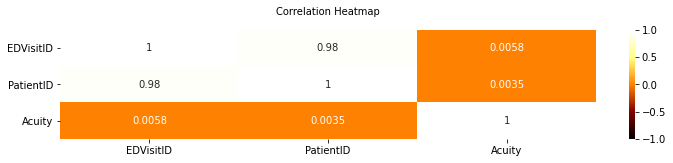

In [24]:
# Create a correlation heatmap
plt.figure(figsize=(12,2))
heatmap = sns.heatmap(df_EDV.corr(), vmin=-1, vmax=1, annot=True, cmap="afmhot")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=15)

plt.show()

### 49.Plot a graph by counting the no. of patients in each department.

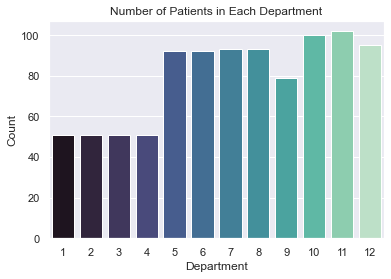

In [34]:
# Create a countplot
sns.set(style="darkgrid")
sns.countplot(data =df_AV, x='VisitDepartmentID', palette="mako")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Number of Patients in Each Department")
plt.show()

### 50.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [35]:
#selecting patient details with conditions
df_new_EDV=df_EDV.loc[((df_EDV['ReasonForVisit'] == 'Migraine') |  (df_EDV['ReasonForVisit'] == 'Pneumonia')) &  (df_EDV['Acuity']  >=2)]
#print(df_new_EDV)
## creating new dataframe with patientID and age
df_new_EDV= df_new_EDV[['PatientID','ReasonForVisit', 'Acuity' ]]
print(df_new_EDV)


      PatientID ReasonForVisit  Acuity
1            12       Migraine       2
3            14       Migraine       3
11           29      Pneumonia       2
12           30      Pneumonia       3
13           31      Pneumonia       4
...         ...            ...     ...
1107        773       Migraine       2
1150        850       Migraine       2
1152        852       Migraine       2
1160        868       Migraine       2
1162        870       Migraine       2

[215 rows x 3 columns]


### 51.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [36]:
x = input("Enter the reason for visit: ")
print(x)

temp_df = df_EDV.loc[(df_EDV['ReasonForVisit'] == x) ]

print("%s%s" % ('Patients admitted with ' + x + ' are : ',  len(temp_df.index)))

Enter the reason for visit: Fever
Fever
Patients admitted with Fever are : 234


### 52.Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [37]:
df_AV.loc[df_AV['BloodPressureSystolic'].idxmax()]

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                            190
BloodPressureDiastolic                       143.989
Pulse                                        74.9769
VisitStatus                                Completed
Name: 236, dtype: object

### 53.Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).

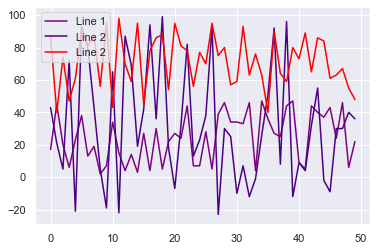

In [38]:
line_1 = np.random.randint(low = 0, high = 50, size = 50)
line_2 = np.random.randint(low = -25, high = 100, size = 50)
line_3 =np.random.randint(low = 40, high = 100, size = 50)

fig, ax = plt.subplots()

ax.plot(line_1, color = 'Purple', label = 'Line 1')
ax.plot(line_2, color = 'Indigo', label = 'Line 2')
ax.plot(line_3, color = 'red', label = 'Line 2')

ax.legend(loc = 'upper left')
plt.show()

### 54.Retrieve the row with minimum DBP using sorting technique.

In [39]:
sorted_df = df_AV.sort_values(by=['BloodPressureDiastolic'], ascending=True)

sorted_df.head(1)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


### 55.Replace all the null values in ReadmissionFlag with 0.

In [28]:
df_RE['ReadmissionFlag'] = df_RE['ReadmissionFlag'].fillna(0)
df_RE['ReadmissionFlag']

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: ReadmissionFlag, Length: 720, dtype: float64

### 56.Get the list of patient ID's which are not there in ReadmissionRegistry.

In [13]:
#selecting patientID column from ReadmissionRegistry sheet
df_new_RE = list(df_RE["PatientID"])
#checking list of patientID's which are not there in ReadmissionRegistry
df_PA[~df_PA['PatientID'].isin(df_new_RE)]
                    


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
134,135,Cally,Aylward,1962-01-13 00:11:17.581,Male,Black/African-American,English
144,145,Sheena,LLC,1966-10-17 13:24:21.621,Male,Black/African-American,English
188,189,Rempel,Group,1974-07-17 04:55:39.964,Male,Black/African-American,English
199,200,Fonz,Group,1964-01-15 01:57:57.966,Male,Black/African-American,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


### 59.Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

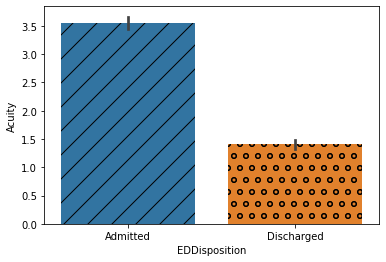

In [22]:
df_EDV.drop_duplicates()
a = sns.barplot(data=df_EDV, x= 'EDDisposition', y= 'Acuity' )

a.patches[0].set_hatch('/')  # Hatching pattern for the first bar
a.patches[1].set_hatch('o') # Hatching pattern for the second bar
plt.show()



### 60.Create a heat map on Readmission Registry table to find correlation between columns values.

In [25]:
#checking correlation
corr=df_RE.corr()
print(corr)

                           AdmissionID  PatientID  ExpectedLOS  \
AdmissionID                   1.000000   0.302079    -0.070080   
PatientID                     0.302079   1.000000    -0.015485   
ExpectedLOS                  -0.070080  -0.015485     1.000000   
ExpectedMortality             0.034083   0.008014     0.220725   
ReadmissionFlag                    NaN        NaN          NaN   
DaysToReadmission             0.049632   0.001710     0.010294   
EDVisitAfterDischargeFlag          NaN        NaN          NaN   

                           ExpectedMortality  ReadmissionFlag  \
AdmissionID                         0.034083              NaN   
PatientID                           0.008014              NaN   
ExpectedLOS                         0.220725              NaN   
ExpectedMortality                   1.000000              NaN   
ReadmissionFlag                          NaN              NaN   
DaysToReadmission                  -0.052563              NaN   
EDVisitAfterDisc

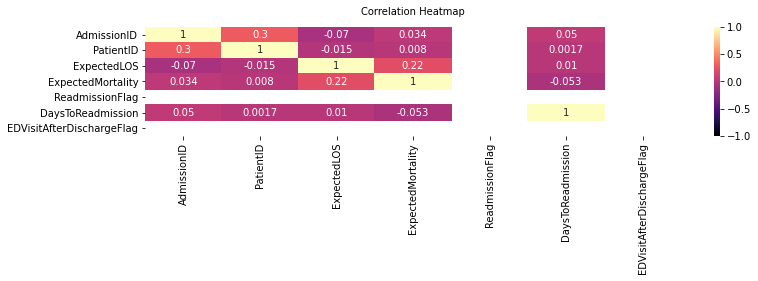

In [27]:
# Create a correlation heatmap
plt.figure(figsize=(12,2))
heatmap = sns.heatmap(df_RE.corr(), vmin=-1, vmax=1, annot=True, cmap="magma")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12)

plt.show()